In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your dataset
df = pd.read_csv('deliveries.csv')

# Create a Pandas Profiling report
profile = ProfileReport(df)

# Generate an HTML report and save it to a file
profile.to_file("report.html")

# Display the report in a Jupyter Notebook
profile.to_notebook_iframe()

C:\Users\Suffwan\AppData\Local\Temp\ipykernel_20952\363612837.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [4]:
match.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [5]:
match.shape

(636, 18)

In [6]:
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\Suffwan\AppData\Local\Temp\ipykernel_20952\2553512226.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [8]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
631  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
631  normal           0  Royal Challengers Bangalore            0   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
631               6         V Kohli   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   

                                                venue          umpire1  \
0           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1             Maharashtra Cricket Association Stadium   A Nand Kishore   
2              Saurashtra Cricket Association Stadium      Nitin Menon   
3                              Holkar Cricket Stadium     AK Chaudhary   
4                               M Chinnaswamy Stadium              NaN   
..                                                ...              ...   
631  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
632                             M Chinnaswamy Stadium     AK Chaudhary   
633                                  Feroz Shah Kotla        M Erasmus   
634                                  Feroz Shah Kotla        M Erasmus   
635                             M Chinnaswamy Stadium  HDPK Dharmasena   

     

In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [12]:
teams = ['Sunrisers Hyderabad', 
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Daredevils']

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(390, 20)

In [16]:
match_df['dl_applied'].value_counts()

0    381
1      9
Name: dl_applied, dtype: int64

In [17]:
match_df = match_df[match_df['dl_applied']==0]

In [18]:
# now we clean the match data so we can join this on delivery data. We did that so we can get the values from the match data and put it on deliveries data.

# from match dataset we need 

match_df = match_df[['match_id','city','winner','total_runs']]

In [19]:
delivery_df = match_df.merge(delivery,on='match_id')

In [20]:
#we did that so we can get results for the second inning 
delivery_df = delivery_df[delivery_df['inning']==2]

In [21]:
delivery_df.shape

(44199, 24)

In [22]:
# we will use this so that it will give sum results after each and every ball of the over 
# we are using cumulative sum on column total runs y
# and we will make it into new column as current score

delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\Suffwan\AppData\Local\Temp\ipykernel_20952\2308411552.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [23]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125           1  Hyderabad  Sunrisers Hyderabad           207       2   
126           1  Hyderabad  Sunrisers Hyderabad           207       2   
127           1  Hyderabad  Sunrisers Hyderabad           207       2   
128           1  Hyderabad  Sunrisers Hyderabad           207       2   
129           1  Hyderabad  Sunrisers Hyderabad           207       2   
...         ...        ...                  ...           ...     ...   
91190       636  Bangalore  Sunrisers Hyderabad           208       2   
91191       636  Bangalore  Sunrisers Hyderabad           208       2   
91192       636  Bangalore  Sunrisers Hyderabad           208       2   
91193       636  Bangalore  Sunrisers Hyderabad           208       2   
91194       636  Bangalore  Sunrisers Hyderabad           208       2   

                      batting_team         bowling_team  over  ball  \
125    Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126    Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127    Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128    Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129    Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                            ...                  ...   ...   ...   
91190  Royal Challengers Bangalore  Sunrisers Hyderabad    20     2   
91191  Royal Challengers Bangalore  Sunrisers Hyderabad    20     3   
91192  Royal Challengers Bangalore  Sunrisers Hyderabad    20     4   
91193  Royal Challengers Bangalore  Sunrisers Hyderabad    20     5   
91194  Royal Challengers Bangalore  Sunrisers Hyderabad    20     6   

             batsman  ... legbye_runs noball_runs  penalty_runs  batsman_runs  \
125         CH Gayle  ...           0           0             0             1   
126    Mandeep Singh  ...           0           0             0             0   
127    Mandeep Singh  ...           0           0             0             0   
128    Mandeep Singh  ...           0           0             0             2   
129    Mandeep Singh  ...           0           0             0             4   
...              ...  ...         ...         ...           ...           ...   
91190    Sachin Baby  ...           0           0             0             2   
91191    Sachin Baby  ...           0           0             0             0   
91192  Iqbal Abdulla  ...           1           0             0             0   
91193    Sachin Baby  ...           0           0             0             1   
91194  Iqbal Abdulla  ...           0           0             0             4   

       extra_runs  total_runs_y  player_dismissed  dismissal_kind  fielder  \
125             0             1               NaN             NaN      NaN   
126             0             0               NaN             NaN      NaN   
127             0             0               NaN             NaN      NaN   
128             0             2               NaN             NaN      NaN   
129             0             4               NaN             NaN      NaN   
...           ...           ...               ...             ...      ...   
91190           0             2               NaN             NaN      NaN   
91191           0             0         CJ Jordan         run out  NV Ojha   
91192           1             1               NaN             NaN      NaN   
91193           0             1               NaN             NaN      NaN   
91194           0             4               NaN             NaN      NaN   

       current_score  
125                1  
126                1  
127                1  
128                3  
129                7  
...              ...  
91190            194  
91191            194  
91192            195  
91193            196  
91194            200  

[44199 rows x 25 columns]

In [24]:
# now we want the to calculate runs left after each ball or after runs are score so we can get new target

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [25]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125           1  Hyderabad  Sunrisers Hyderabad           207       2   
126           1  Hyderabad  Sunrisers Hyderabad           207       2   
127           1  Hyderabad  Sunrisers Hyderabad           207       2   
128           1  Hyderabad  Sunrisers Hyderabad           207       2   
129           1  Hyderabad  Sunrisers Hyderabad           207       2   
...         ...        ...                  ...           ...     ...   
91190       636  Bangalore  Sunrisers Hyderabad           208       2   
91191       636  Bangalore  Sunrisers Hyderabad           208       2   
91192       636  Bangalore  Sunrisers Hyderabad           208       2   
91193       636  Bangalore  Sunrisers Hyderabad           208       2   
91194       636  Bangalore  Sunrisers Hyderabad           208       2   

                      batting_team         bowling_team  over  ball  \
125    Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126    Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127    Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128    Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129    Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                            ...                  ...   ...   ...   
91190  Royal Challengers Bangalore  Sunrisers Hyderabad    20     2   
91191  Royal Challengers Bangalore  Sunrisers Hyderabad    20     3   
91192  Royal Challengers Bangalore  Sunrisers Hyderabad    20     4   
91193  Royal Challengers Bangalore  Sunrisers Hyderabad    20     5   
91194  Royal Challengers Bangalore  Sunrisers Hyderabad    20     6   

             batsman  ... noball_runs penalty_runs  batsman_runs  extra_runs  \
125         CH Gayle  ...           0            0             1           0   
126    Mandeep Singh  ...           0            0             0           0   
127    Mandeep Singh  ...           0            0             0           0   
128    Mandeep Singh  ...           0            0             2           0   
129    Mandeep Singh  ...           0            0             4           0   
...              ...  ...         ...          ...           ...         ...   
91190    Sachin Baby  ...           0            0             2           0   
91191    Sachin Baby  ...           0            0             0           0   
91192  Iqbal Abdulla  ...           0            0             0           1   
91193    Sachin Baby  ...           0            0             1           0   
91194  Iqbal Abdulla  ...           0            0             4           0   

       total_runs_y  player_dismissed  dismissal_kind  fielder  current_score  \
125               1               NaN             NaN      NaN              1   
126               0               NaN             NaN      NaN              1   
127               0               NaN             NaN      NaN              1   
128               2               NaN             NaN      NaN              3   
129               4               NaN             NaN      NaN              7   
...             ...               ...             ...      ...            ...   
91190             2               NaN             NaN      NaN            194   
91191             0         CJ Jordan         run out  NV Ojha            194   
91192             1               NaN             NaN      NaN            195   
91193             1               NaN             NaN      NaN            196   
91194             4               NaN             NaN      NaN            200   

       runs_left  
125          206  
126          206  
127          206  
128          204  
129          200  
...          ...  
91190         14  
91191         14  
91192         13  
91193         12  
91194          8  

[44199 rows x 26 columns]

In [26]:
# now we want to calculate how much balls left 

delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [27]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125           1  Hyderabad  Sunrisers Hyderabad           207       2   
126           1  Hyderabad  Sunrisers Hyderabad           207       2   
127           1  Hyderabad  Sunrisers Hyderabad           207       2   
128           1  Hyderabad  Sunrisers Hyderabad           207       2   
129           1  Hyderabad  Sunrisers Hyderabad           207       2   
...         ...        ...                  ...           ...     ...   
91190       636  Bangalore  Sunrisers Hyderabad           208       2   
91191       636  Bangalore  Sunrisers Hyderabad           208       2   
91192       636  Bangalore  Sunrisers Hyderabad           208       2   
91193       636  Bangalore  Sunrisers Hyderabad           208       2   
91194       636  Bangalore  Sunrisers Hyderabad           208       2   

                      batting_team         bowling_team  over  ball  \
125    Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126    Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127    Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128    Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129    Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                            ...                  ...   ...   ...   
91190  Royal Challengers Bangalore  Sunrisers Hyderabad    20     2   
91191  Royal Challengers Bangalore  Sunrisers Hyderabad    20     3   
91192  Royal Challengers Bangalore  Sunrisers Hyderabad    20     4   
91193  Royal Challengers Bangalore  Sunrisers Hyderabad    20     5   
91194  Royal Challengers Bangalore  Sunrisers Hyderabad    20     6   

             batsman  ... penalty_runs batsman_runs  extra_runs  total_runs_y  \
125         CH Gayle  ...            0            1           0             1   
126    Mandeep Singh  ...            0            0           0             0   
127    Mandeep Singh  ...            0            0           0             0   
128    Mandeep Singh  ...            0            2           0             2   
129    Mandeep Singh  ...            0            4           0             4   
...              ...  ...          ...          ...         ...           ...   
91190    Sachin Baby  ...            0            2           0             2   
91191    Sachin Baby  ...            0            0           0             0   
91192  Iqbal Abdulla  ...            0            0           1             1   
91193    Sachin Baby  ...            0            1           0             1   
91194  Iqbal Abdulla  ...            0            4           0             4   

       player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 NaN             NaN      NaN              1        206   
126                 NaN             NaN      NaN              1        206   
127                 NaN             NaN      NaN              1        206   
128                 NaN             NaN      NaN              3        204   
129                 NaN             NaN      NaN              7        200   
...                 ...             ...      ...            ...        ...   
91190               NaN             NaN      NaN            194         14   
91191         CJ Jordan         run out  NV Ojha            194         14   
91192               NaN             NaN      NaN            195         13   
91193               NaN             NaN      NaN            196         12   
91194               NaN             NaN      NaN            200          8   

       balls_left  
125           119  
126           118  
127           117  
128           116  
129           115  
...           ...  
91190           4  
91191           3  
91192           2  
91193           1  
91194           0  

[44199 rows x 27 columns]

In [28]:
# now we need to get how many wickets left, now we have to some changes to get this result since the information is not given as we want.
# you can see on column that it shows nan value under player dismissle 


delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x== "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets_left'] = 10 - wickets 
delivery_df.head()

C:\Users\Suffwan\AppData\Local\Temp\ipykernel_20952\3379639000.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 0             NaN      NaN              1        206   
126                 0             NaN      NaN              1        206   
127                 0             NaN      NaN              1        206   
128                 0             NaN      NaN              3        204   
129                 0             NaN      NaN              7        200   

     balls_left  wickets_left  
125         119            10  
126         118            10  
127         117            10  
128         116            10  
129         115            10  

[5 rows x 28 columns]

In [29]:
delivery_df.tail()

match_id       city               winner  total_runs_x  inning  \
91190       636  Bangalore  Sunrisers Hyderabad           208       2   
91191       636  Bangalore  Sunrisers Hyderabad           208       2   
91192       636  Bangalore  Sunrisers Hyderabad           208       2   
91193       636  Bangalore  Sunrisers Hyderabad           208       2   
91194       636  Bangalore  Sunrisers Hyderabad           208       2   

                      batting_team         bowling_team  over  ball  \
91190  Royal Challengers Bangalore  Sunrisers Hyderabad    20     2   
91191  Royal Challengers Bangalore  Sunrisers Hyderabad    20     3   
91192  Royal Challengers Bangalore  Sunrisers Hyderabad    20     4   
91193  Royal Challengers Bangalore  Sunrisers Hyderabad    20     5   
91194  Royal Challengers Bangalore  Sunrisers Hyderabad    20     6   

             batsman  ... batsman_runs extra_runs  total_runs_y  \
91190    Sachin Baby  ...            2          0             2   
91191    Sachin Baby  ...            0          0             0   
91192  Iqbal Abdulla  ...            0          1             1   
91193    Sachin Baby  ...            1          0             1   
91194  Iqbal Abdulla  ...            4          0             4   

       player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
91190                 0             NaN      NaN            194         14   
91191                 1         run out  NV Ojha            194         14   
91192                 0             NaN      NaN            195         13   
91193                 0             NaN      NaN            196         12   
91194                 0             NaN      NaN            200          8   

       balls_left  wickets_left  
91190           4             4  
91191           3             3  
91192           2             3  
91193           1             3  
91194           0             3  

[5 rows x 28 columns]

In [30]:
# now we need to find the current run rate 
delivery_df['current_run_rate'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [31]:
# now we we need to get require run rate
delivery_df['require_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

In [32]:
#now we need to make a column in which if batting team won the match it will show result 1 other wise 0

def result(row): return 1 if row['batting_team'] == row['winner'] else 0

In [33]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [34]:
# now we will get the columns which we require from our dataset 

final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','current_run_rate','require_run_rate','result']]

In [35]:
#now we will shuffle the data so that matching data won't create any biase 
final_df = final_df.sample(final_df.shape[0])

In [36]:
final_df.sample()

batting_team         bowling_team    city  runs_left  balls_left  \
23687  Kings XI Punjab  Chennai Super Kings  Durban         91          94   

       wickets_left  total_runs_x  current_run_rate  require_run_rate  result  
23687             9           116          5.769231          5.808511       0

In [37]:
# still we have some NA values which can create some problems afterward for test so will drop those 

final_df.dropna(inplace=True)

In [38]:
# Now we will not take those data in which we have 0 balls left because require run rate will show large number/infinite number if team lose
# Or it will show negative number if team wins 

final_df = final_df[final_df['balls_left'] !=0]

In [39]:
# now we will perform train test on our data set 

x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [40]:
# now we will use one hot encoding because our dataset has some catagorical values which we need to change 

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer ([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'] )
]
,remainder='passthrough')

In [41]:
# now I will try to test it on logistic regression because we want to find on every stage what will be the probability of winninf for both team 
# that is why we use logestic regression because it will use internal sigmoid function to calculte probality.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [42]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [43]:
pipe.fit(x_train,y_train)

C:\Users\Suffwan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

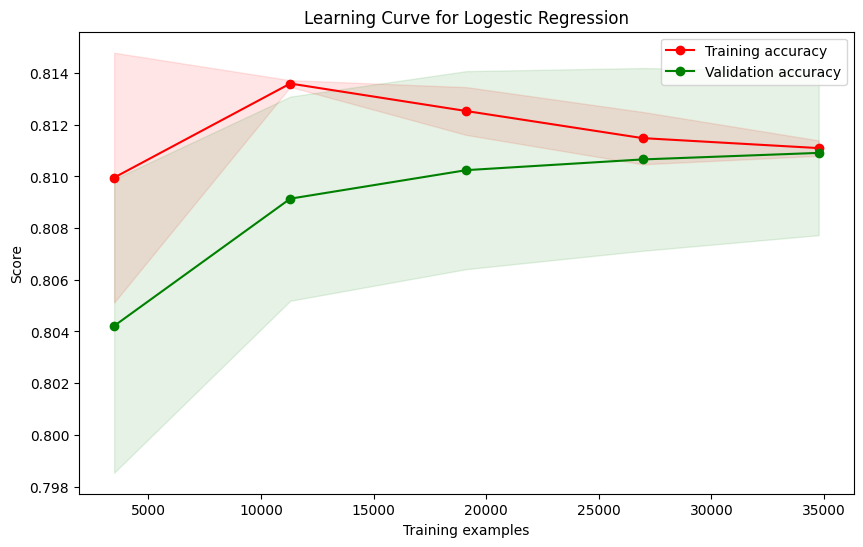

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
# Add this line to enable inline plotting in Jupyter notebook
%matplotlib inline

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(pipe, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), random_state=1)

# Calculate mean and standard deviation of training scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation accuracy")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve for Logestic Regression")
plt.show()

In [45]:
y_pred = pipe.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.809501898078914

In [47]:
pipe.predict_proba(x_test)[2]

array([0.81139339, 0.18860661])

In [48]:
from sklearn.metrics import classification_report

# Assuming you already have a trained Logistic Regression model named 'pipe'
# and the test data in 'x_test' and 'y_test'
y_pred = pipe.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4236
           1       0.82      0.81      0.81      4457

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693



In [49]:
#we are making function(match progression) it will collect the ball by ball data and if we give match id in it 
#and if you give it you model it will give you win probability of the team in second inning after each ball and each wickets
#factors which effect the probability are runs get scored, bastman get out,Require Run rate getting getting high or Current run rate getting low
#this will affect the probability of winning or lossing in the match 


def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'current_run_rate', 'require_run_rate', 'result']]
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    # Calculate wickets_in_over based on 'wickets_left' column
    wickets_left = list(temp_df['wickets_left'].values)
    new_wickets_left = wickets_left[:]
    new_wickets_left.insert(0, 10)
    
    # Ensure that both lists have the same length
    if len(new_wickets_left) > len(wickets_left):
        wickets_left.append(0)
    
    wickets = np.array(new_wickets_left) - np.array(wickets_left)
    temp_df['wickets_in_over'] = wickets[:temp_df.shape[0]]

    print("Target-", target)
    
    
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over','current_run_rate','require_run_rate','lose', 'win']]
    return temp_df, target



In [50]:
temp_df, target = match_progression(delivery_df,74,pipe)
print(temp_df)

Target- 178
      end_of_over  runs_after_over  wickets_in_over  current_run_rate  \
7471            1                4                0          4.000000   
7479            2                8                0          6.000000   
7485            3                1                0          4.333333   
7491            4                7                1          5.000000   
7497            5               12                0          6.400000   
7503            6               13                0          7.500000   
7509            7                9                0          7.714286   
7517            8               15                0          8.625000   
7523            9                7                0          8.444444   
7530           10               17                0          9.300000   
7536           11                9                1          9.272727   
7542           12                9                0          9.250000   
7548           13                8     

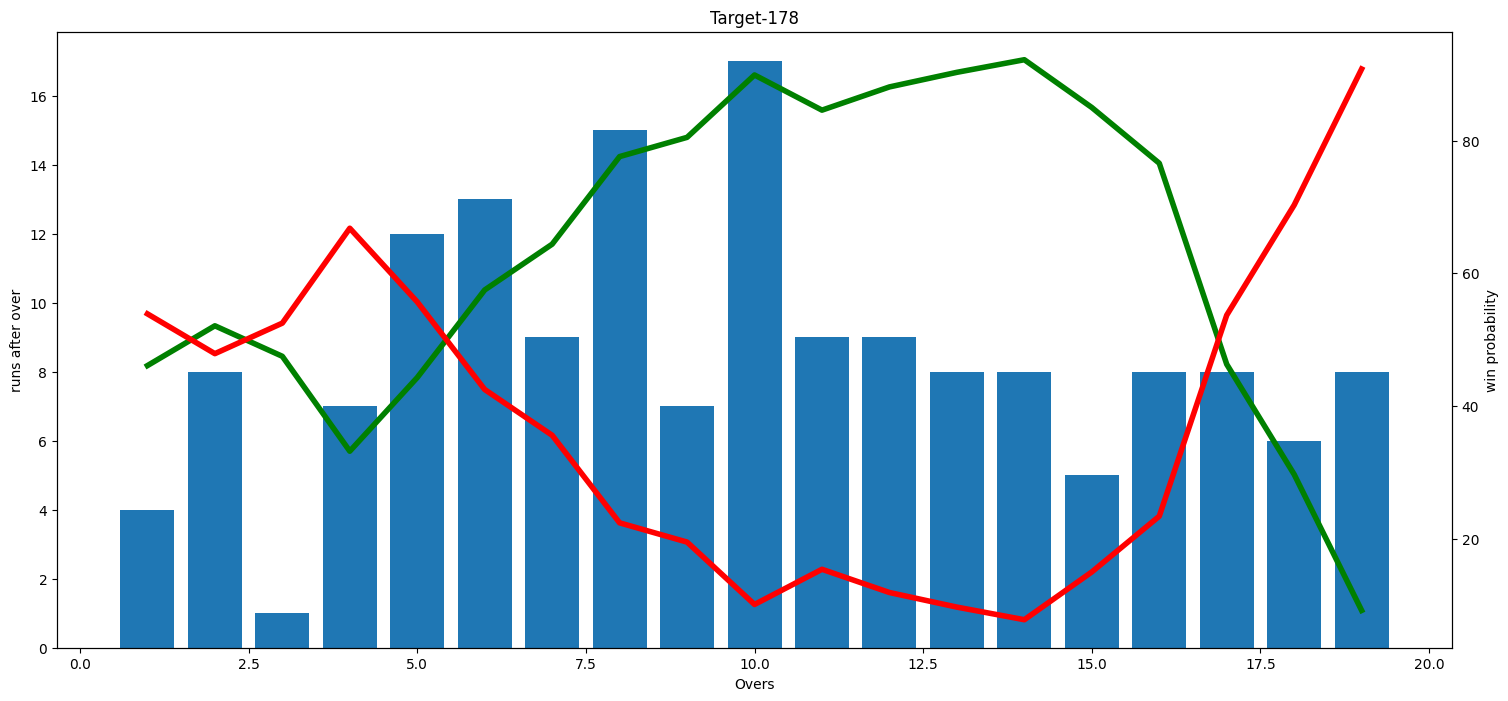

In [51]:
#in this graph bars shows scores after overs, greeen show wining probability, red show loosing probability, yellow shows for wickets

import matplotlib.pyplot as plt
#plt.figure(figsize=(18,8))

#import matplotlib.pyplot as plt
import numpy as np

# Define your match_progression function here

# Example usage
match_id = 74  # Replace with the desired match_id

# Create a new figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel('Overs')
ax1.set_ylabel('runs after over')  # Add your label for the secondary y-axis

plt.title('Target-' + str(target))

# Create a second y-axis (ax2) and plot the data on it
ax2 = ax1.twinx()
ax2.set_ylabel('win probability')  # Add your label for the secondary y-axis

# Plot additional data on the secondary y-axis (adjust as needed)
line1 = ax2.plot(temp_df['end_of_over'], temp_df['win'], color='green', linestyle='solid', linewidth=4)
line2 = ax2.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linestyle='solid', linewidth=4)



# Explicitly display the plot
plt.show()